1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z= 3.4661629670697414


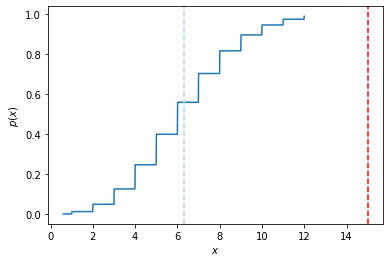

The probability that in a single year we observe 15 or more hurricanes is: 0.0008444930803583883
Test statistic comparison: 


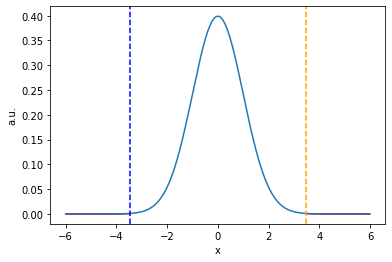

p-value = 0.0005279431738299246


In [34]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

mu = 6.3 #historic average
x0 = 15 #average of 2015
sigma = sqrt(mu) #std of a poisson distribution

Z = abs(x0 - mu) / sigma

print("Z=",Z)

# plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(mu - w - 3, w + mu + 3, 1000)
y = stats.poisson.cdf(x, mu)
plt.plot(x, y)
#plt.fill_between(x, y, where=np.abs(x - mu) > w, color='red')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

result = 1-stats.poisson.cdf(k=15, mu=6.3)
print("The probability that in a single year we observe 15 or more hurricanes is:",result)

# plot the test statistics and its pdf
print("Test statistic comparison: ")
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='red')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

pre and post means:  116.7 135.4
pre and post variances:  87.56666666666668 156.26666666666668
sigma: 11.04158805003459
T: -3.786997938137629


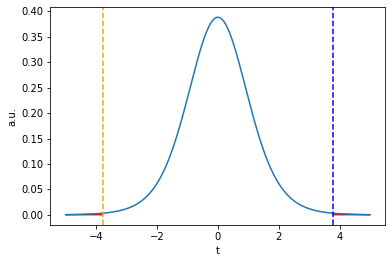

p-value = 0.004302464132864604
since our significance value is a/2 (=0.0025) and p-value is not less then a, we accept the null hypothesis, so the change in blood pressure is not significant


In [46]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

mean_pre = np.mean(pre)
mean_post = np.mean(post)

variance_pre = np.var(pre,ddof=1)
variance_post = np.var(post,ddof=1)

print("pre and post means: ",mean_pre,mean_post)
print("pre and post variances: ",variance_pre,variance_post)

sigma = sqrt((variance_pre + variance_post)/2)
print("sigma:",sigma)

T = (mean_pre-mean_post)/(sigma*sqrt(2/n))
print("T:",T)

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='red')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

print("since our significance value is a/2 (=0.0025) and p-value is not less then a, we accept the null hypothesis, so the change in blood pressure is not significant")


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequency: 2.0


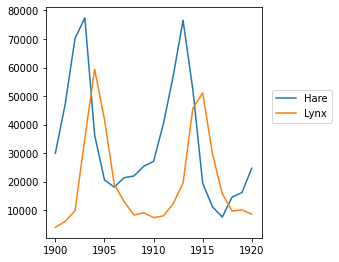

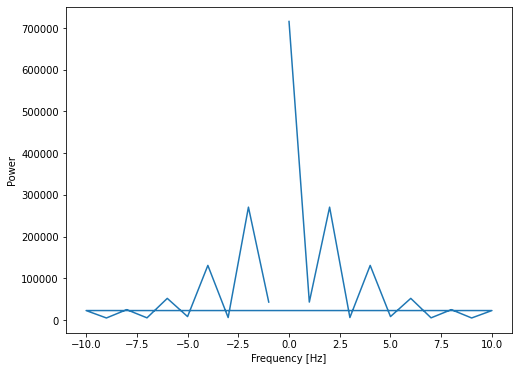

In [72]:
from scipy import fftpack

data = np.loadtxt('data/populations.txt')

year, hares, lynxes, carrots = data.T # trick: columns to variables

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx'), loc=(1.05, 0.5))

# The FFT of the signal
sig_fft = fftpack.fft(hares)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(len(hares),d=1/len(hares))

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

#TODO CORRECT RESULTS....


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.